## WEEKEND MOVIE TRIP

Data Clustering - Project 3

Blockbuster or art film?

Data Source: https://grouplens.org/datasets/movielens/ small data set

The data are contained in the files links.csv, movies.csv, ratings.csv and tags.csv.

This notebook is a movie recommendation model using K-means clustering (to recommend similar movies to the user). The two features extracted from the dataset include: Average Movie Rating and Tags.

Reference https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

In [1]:
import pandas as pd
#Reading movies.csv file into pandas data frame
df_movies = pd.read_csv("movies.csv")    #use the path for your dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
#Reading tags.csv file into pandas data frame
df_tags = pd.read_csv("tags.csv")       #use the path for your dataset
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [3]:
#Reading ratings.csv file into pandas data frame
df_ratings = pd.read_csv("ratings.csv")  #use the path for your dataset
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#Merging data sets rating, movies and tags on "moviedId"
df_movietagratings = pd.merge(pd.merge(df_movies, df_ratings, on=['movieId']), df_tags, on=['movieId'])
df_movietagratings.head()

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825


In [5]:
#processing the dataframe to use the required columns only
df_movietagratings = df_movietagratings[['movieId','title', 'genres', 'rating','tag']]
df_movietagratings = df_movietagratings.sort_values(by=['movieId', 'rating'])
df_movietagratings.head()

,movieId,title,genres,rating,tag
78,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.5,pixar
79,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.5,pixar
80,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.5,fun
477,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.5,pixar
478,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.5,pixar


#### As we can see for each movie there are wide range of ratings so let's create an average rating for each movie in order to recommend a movie based on it's average rating

In [6]:
#Calculating the average ratings for each movie 
df_avgratings = df_movietagratings.groupby('movieId')['rating'].mean().reset_index(name ='average rating')
df_avgratings.head(10)   

,movieId,average rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,5,3.071429
4,7,3.185185
5,11,3.671429
6,14,3.833333
7,16,3.926829
8,17,3.776119
9,21,3.494382


In [7]:
#Merge the movietagrating data frane to average ratings
df_movietagratings = pd.merge(df_movietagratings, df_avgratings,on=['movieId'])
df_movietagratings.head(10) 

,movieId,title,genres,rating,tag,average rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.5,pixar,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.5,pixar,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.5,fun,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.5,pixar,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.5,pixar,3.92093
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.5,fun,3.92093
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,pixar,3.92093
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,pixar,3.92093
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,fun,3.92093
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,pixar,3.92093


In [8]:
#remove duplicates from the dataframe
df_movietagratings = df_movietagratings.drop_duplicates()
df_movietagratings.head(10)

,movieId,title,genres,rating,tag,average rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.5,pixar,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.5,fun,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.5,pixar,3.92093
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.5,fun,3.92093
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,pixar,3.92093
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,fun,3.92093
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,pixar,3.92093
26,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,fun,3.92093
48,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,pixar,3.92093
50,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,fun,3.92093


In [9]:
#Start with Feature Engineering
#finding Null values
df_movietagratings[df_movietagratings.isnull().any(axis=1)]

,movieId,title,genres,rating,tag,average rating


In [10]:
#Finding datatypes to locate object datatype
df_movietagratings.dtypes

movieId             int64
title              object
genres             object
rating            float64
tag                object
average rating    float64
dtype: object

#### As each movie has different kind of genre so let's split the genre of each movie to different rows so that we can recommend a movie based on a particular genre

In [11]:
#Splitting the 'genre' tag for each movie by '|' so that to have individual genres as a row in df
genre = df_movietagratings['genres'].str.split('|').apply(pd.Series, 1).stack()
genre.index = genre.index.droplevel(-1)
genre.name = 'genres'
del df_movietagratings['genres']
df_movietagratings = df_movietagratings.join(genre)
df_movietagratings.head()

,movieId,title,rating,tag,average rating,genres
0,1,Toy Story (1995),0.5,pixar,3.92093,Adventure
0,1,Toy Story (1995),0.5,pixar,3.92093,Animation
0,1,Toy Story (1995),0.5,pixar,3.92093,Children
0,1,Toy Story (1995),0.5,pixar,3.92093,Comedy
0,1,Toy Story (1995),0.5,pixar,3.92093,Fantasy


In [12]:
#saving processed dataframe
df_movietagratings.to_csv("movies_rating_tag.csv")

In [13]:
#changing "tag", "genres" to category
df_movietagratings["tag"] = df_movietagratings["tag"].astype('category')
df_movietagratings["genres"] = df_movietagratings["genres"].astype('category')

In [14]:
#using Label Encoding
df_movietagratings["tag"] = df_movietagratings["tag"].cat.codes
df_movietagratings["genres"] = df_movietagratings["genres"].cat.codes

df_movietagratings.head()

,movieId,title,rating,tag,average rating,genres
0,1,Toy Story (1995),0.5,1239,3.92093,2
0,1,Toy Story (1995),0.5,1239,3.92093,3
0,1,Toy Story (1995),0.5,1239,3.92093,4
0,1,Toy Story (1995),0.5,1239,3.92093,5
0,1,Toy Story (1995),0.5,1239,3.92093,9


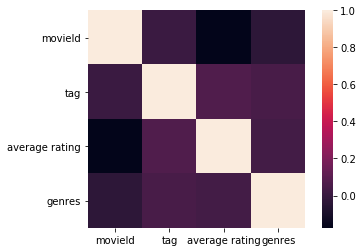

In [23]:
#check correlation between features
import seaborn as sns
df_movietagratings_temp = df_movietagratings[['movieId', 'tag','average rating', 'genres']] #Subsetting the data
cor = df_movietagratings_temp.corr()
sns.heatmap(cor, square = True)

#### We have obtained the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents high correlation. We can see that rating is highly correlated with genres.

In [16]:
# Taking sample data set as X
X = df_movietagratings.iloc[:,[3, 4]].values

from sklearn.cluster import KMeans
wcss =[]

#### Determining the cluster size

In [17]:
#iterating 10 times to find the kmeans for each centroid
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

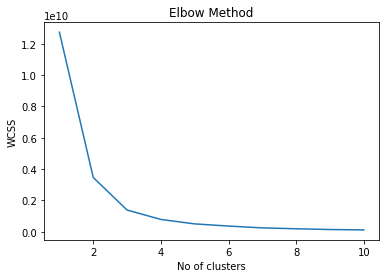

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

#### As we can see the change is min from 4 to 5 so the no of clusters to be taken is 5

In [19]:
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

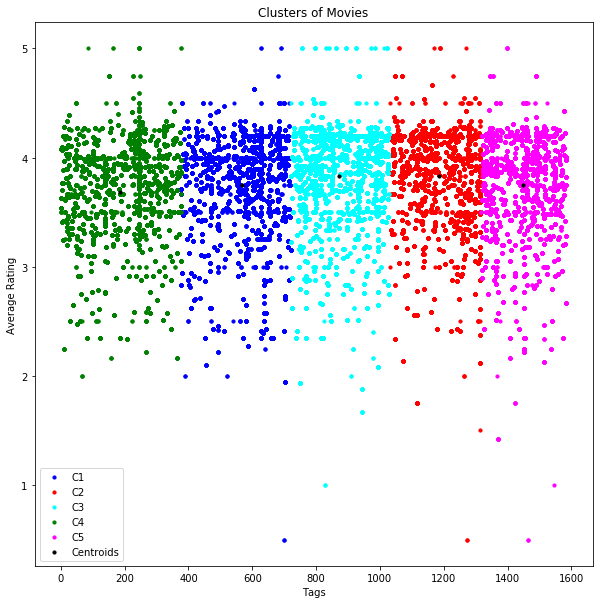

In [20]:
# Visualising the clusters

plt.figure(figsize=(10,10))
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 10, c='blue', label = 'C1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 10, c='red', label = 'C2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 10, c='cyan', label = 'C3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 10, c='green', label = 'C4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 10, c='magenta', label = 'C5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 10, c = 'black', label = 'Centroids')
   
plt.title('Clusters of Movies')
plt.xlabel('Tags')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

#### Finding the movie present in each clusters

In [21]:
#in row_dict we store each movie title from each row
row_dict = []
for index, row in df_movietagratings.iterrows():
        row_dict.append(row['title'])

#find the clusters        
labels = kmeans.predict(X)
clusters = {}
n = 0
for item in labels:
    if item in clusters:
        if(row_dict[n] not in clusters[item]):
            clusters[item].append(row_dict[n])
    else:
        clusters[item] = [row_dict[n]]
    n +=1

#sort the dictionary    
import collections
clusters = collections.OrderedDict(sorted(clusters.items()))   

#### Printing the group of movies for each cluster up to 10 movies in each cluster (for convenience of size) 

In [22]:
#print the clusters for 10 movies each
for item in clusters:
    print ("Cluster ", item + 1)
    n = 1
    for i in clusters[item]:
            print (i)
            n += 1
            if(n > 10):
                print("\n")
                break

Cluster  1
Jumanji (1995)
Leaving Las Vegas (1995)
Othello (1995)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Dead Man Walking (1995)
Clueless (1995)
Cry, the Beloved Country (1995)
Richard III (1995)
Mighty Aphrodite (1995)
Braveheart (1995)


Cluster  2
Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Father of the Bride Part II (1995)
Sabrina (1995)
American President, The (1995)
Nixon (1995)
City of Lost Children, The (Cité des enfants perdus, La) (1995)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Babe (1995)


Cluster  3
Toy Story (1995)
Jumanji (1995)
Dangerous Minds (1995)
Dead Man Walking (1995)
Clueless (1995)
Usual Suspects, The (1995)
Bottle Rocket (1996)
Happy Gilmore (1996)
Braveheart (1995)
Boomerang (1992)


Cluster  4
Casino (1995)
Sense and Sensibility (1995)
Get Shorty (1995)
Persuasion (1995)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Babe (1995)
Clueless (1995)
Cry, the Beloved Country (1995)
Restoration (1995)
To Die For (1995)


Cluster  5
Copycat (1995)
Dangero

#### Now to recommend movies from a given movie name we find the cluster of the given movie name and recommend some movies from that cluster. Notice that there are some overlaping movies for each cluster. This is coz of the cluster overlap for some particular movies which we can see from our scatter plot